In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

24
24


Text(0.1, 0.05, '$K = 1, \\omega=-2.97$ MeV')

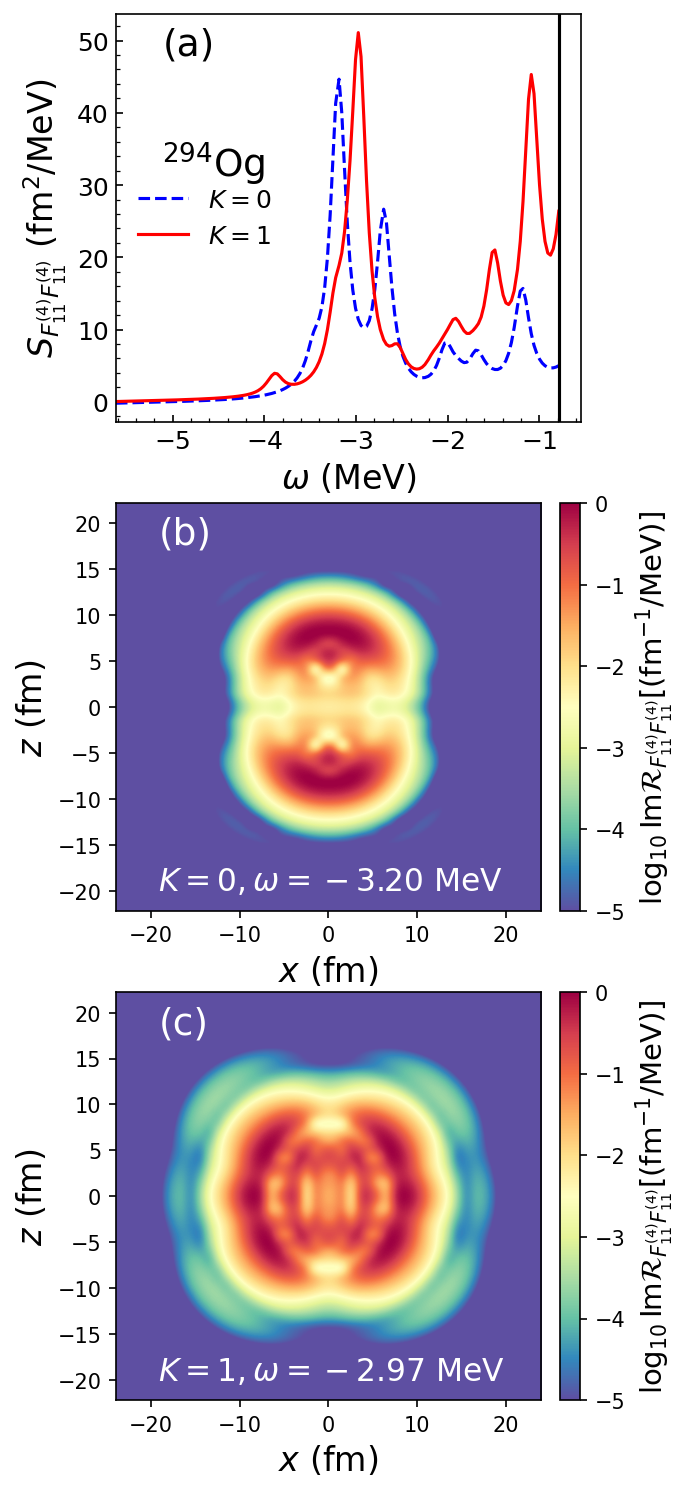

In [12]:
'''
Figure 1
'''



# combined figure with all the subplots

fig, ax = plt.subplots(3,1, dpi = 150, figsize = (4,12))


data_K0 = np.loadtxt('response/Fig1/response_K0_NSDRNSDR_Og294.dat')
data_K1 = np.loadtxt('response/Fig1/response_K1_NSDRNSDR_Og294.dat')


ax[0].plot(data_K0[:,0], data_K0[:,2], color = 'blue', ls = '--', label = '$K = 0$')
ax[0].plot(data_K1[:,0], data_K1[:,2], color = 'red', label = '$K = 1$')
ax[0].set_xlim(np.min(data_K0[:,0]))
#ax[0].set_ylim(0)
ax[0].axvline(-0.789, color = 'black')
ax[0].legend(frameon = False, fontsize = 12, loc = 'center left')

ax[0].annotate('${}^{294}$Og', (0.1,0.6), xycoords='axes fraction', size = 18)

ax[0].set_ylabel('$S_{F_{11}^{(4)}F_{11}^{(4)}}$ (fm${}^2$/MeV)', size = 16)
ax[0].set_xlabel('$\omega$ (MeV)', size = 16)

ax[0].annotate('(a)', (0.1,0.9), xycoords='axes fraction', size = 18)

ax[0].tick_params(axis="y",direction="in", which = 'both', labelsize = 12)
ax[0].tick_params(axis="x",direction="in", which = 'both', labelsize = 12)

ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.2))


#######################################################

data = np.loadtxt('response/Fig1/trans_dens_K0_NSDRNSDR.out', max_rows=1)

N =int(np.sqrt(data[0]))-1
print(N)

R = data[1]
Z = data[2]

data = np.loadtxt('response/Fig1/trans_dens_K0_NSDRNSDR.out', skiprows=1)

drho_re = data[:,0]
drho_re = drho_re.reshape(N,N)

drho_im = data[:,1]
drho_im = drho_im.reshape(N,N)


rows = N
cols = N
# Create a blank matrix to hold the full symmetric matrix
full_matrix = np.zeros((2 * rows, 2 * cols))

# Fill in the quadrant we have data for
full_matrix[rows:, cols:] = drho_im

# Fill in the other quadrants using symmetry
# Symmetry along the x-axis
full_matrix[:rows, cols:] = np.flipud(drho_im)
# Symmetry along the y-axis
full_matrix[rows:, :cols] = np.fliplr(drho_im)
# Symmetry along both axes (diagonal symmetry)
full_matrix[:rows, :cols] = np.flipud(np.fliplr(drho_im))

extent = [-R,+R,-Z,+Z]

im1 =ax[1].imshow(np.log10(np.abs(full_matrix)), interpolation = 'bicubic'
           , vmin= -5,vmax=0, cmap='Spectral_r',
          extent = extent, aspect = 'auto')
cbar1 = plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
cbar1.set_label('$\log_{10}$'+'Im'+'$\mathcal{R}_{F_{11}^{(4)}F_{11}^{(4)}}$[(fm${}^{-1}$/MeV)]', fontsize=14)
#cbar = fig.colorbar(ax = ax[1])
# cbar.set_label(r'$-\pi \text{Im} \delta \rho (r,z)$ [fm${}^{-3}$]', fontsize=14)
# plt.title('${}^{258}$Sg, $\omega = -1.970$ MeV, GT${}^+$, K = 1')

ax[1].set_xlabel('$x$ (fm)', size = 16)
ax[1].set_ylabel('$z$ (fm)', size = 16)

ax[1].annotate(r'(b)', (0.1,0.9), xycoords='axes fraction', size = 18, color = 'white')
ax[1].annotate(r'$K = 0, \omega=-3.20$ MeV', (0.1,0.05), xycoords='axes fraction', size = 15, color = 'white')

#######################################################

data = np.loadtxt('response/Fig1/trans_dens_K1_NSDRNSDR.out', max_rows=1)

N =int(np.sqrt(data[0]))-1
print(N)

R = data[1]
Z = data[2]

data = np.loadtxt('response/Fig1/trans_dens_K1_NSDRNSDR.out', skiprows=1)

drho_re = data[:,0]
drho_re = drho_re.reshape(N,N)

drho_im = data[:,1]
drho_im = drho_im.reshape(N,N)


rows = N
cols = N
# Create a blank matrix to hold the full symmetric matrix
full_matrix = np.zeros((2 * rows, 2 * cols))

# Fill in the quadrant we have data for
full_matrix[rows:, cols:] = drho_im

# Fill in the other quadrants using symmetry
# Symmetry along the x-axis
full_matrix[:rows, cols:] = np.flipud(drho_im)
# Symmetry along the y-axis
full_matrix[rows:, :cols] = np.fliplr(drho_im)
# Symmetry along both axes (diagonal symmetry)
full_matrix[:rows, :cols] = np.flipud(np.fliplr(drho_im))

extent = [-R,+R,-Z,+Z]

im1 =ax[2].imshow(np.log10(np.abs(full_matrix)), interpolation = 'bicubic'
           , vmin= -5,vmax=0, cmap='Spectral_r',
          extent = extent, aspect = 'auto')
cbar1 = plt.colorbar(im1, ax=ax[2], fraction=0.046, pad=0.04)
cbar1.set_label('$\log_{10}$'+'Im'+'$\mathcal{R}_{F_{11}^{(4)}F_{11}^{(4)}}$[(fm${}^{-1}$/MeV)]', fontsize=14)
#cbar = fig.colorbar(ax = ax[1])
# cbar.set_label(r'$-\pi \text{Im} \delta \rho (r,z)$ [fm${}^{-3}$]', fontsize=14)
# plt.title('${}^{258}$Sg, $\omega = -1.970$ MeV, GT${}^+$, K = 1')

ax[2].set_xlabel('$x$ (fm)', size = 16)
ax[2].set_ylabel('$z$ (fm)', size = 16)

ax[2].annotate(r'(c)', (0.1,0.9), xycoords='axes fraction', size = 18, color = 'white')
ax[2].annotate(r'$K = 1, \omega=-2.97$ MeV', (0.1,0.05), xycoords='axes fraction', size = 15, color = 'white')



#plt.savefig('figs/Og294_transition_density.pdf', bbox_inches = 'tight')

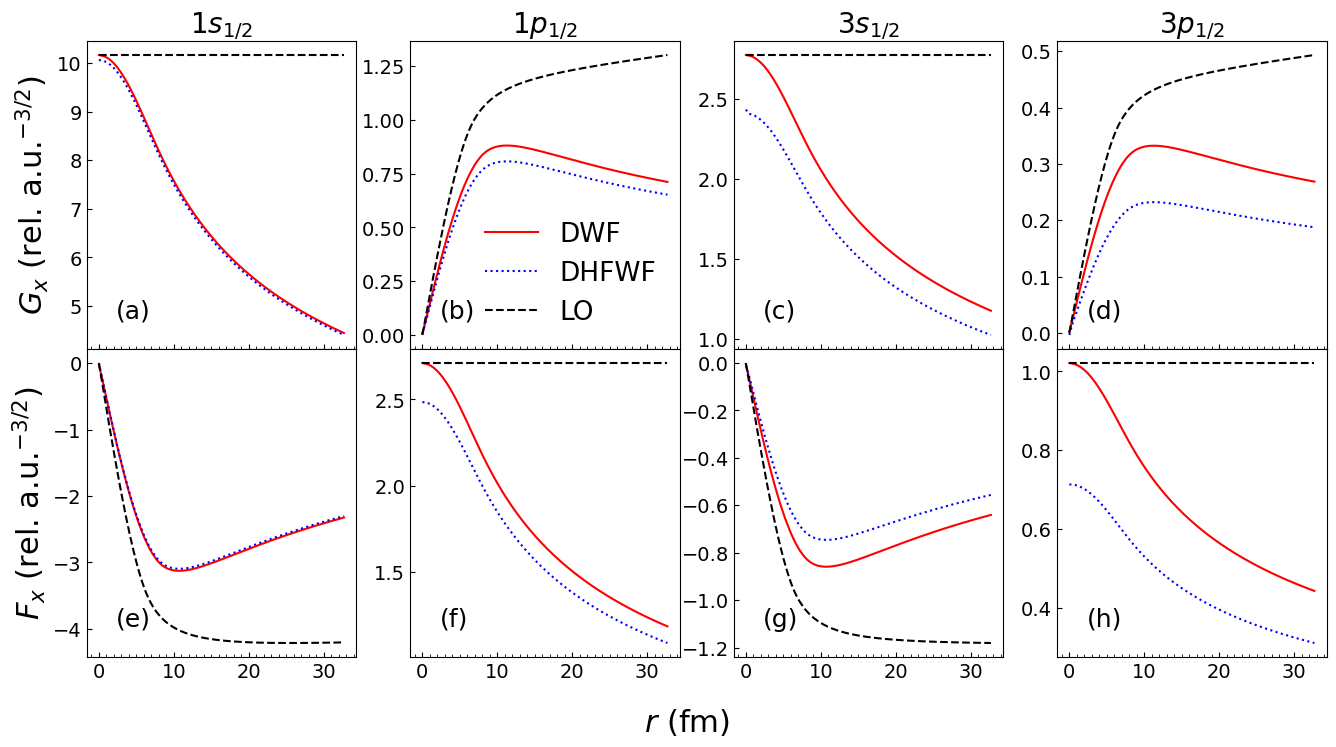

In [14]:
'''
Figure 2
'''

# plotting wavefunctions for comparison
state = ['1s1_2','1p1_2','3s1_2','3p1_2']
state_label = ['$1s_{1/2}$','$1p_{1/2}$','$3s_{1/2}$','$3p_{1/2}$']
labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']

fig, ax = plt.subplots(2,4, figsize = (4*4,8))

for s in range(len(state)):

    data_DIRAC = np.loadtxt('calculations_R/Og294/GT_1p/K0/WAVES_INT_'+state[s]+'_DIRAC.DAT')
    data_DIRAC = data_DIRAC[data_DIRAC[:,0].argsort()]
    ax[0,s].plot(data_DIRAC[:,0], data_DIRAC[:,1], label = 'DWF', color = 'red')
    ax[1,s].plot(data_DIRAC[:,0], data_DIRAC[:,2], label = 'DWF', color = 'red')
    
    data_GRASP = np.loadtxt('calculations_R/Og294/GT_1p/K0/WAVES_INT_'+state[s]+'_MCDF.DAT')
    data_GRASP = data_GRASP[data_GRASP[:,0].argsort()]
    ax[0,s].plot(data_GRASP[:,0], data_GRASP[:,1], label = 'DHFWF', color = 'blue', ls = ':')
    ax[1,s].plot(data_GRASP[:,0], data_GRASP[:,2], label = 'DHFWF', color = 'blue', ls = ':')
    
    data_approx = np.loadtxt('calculations_R/Og294/GT_1p/K0/WAVES_APPROX_'+state[s]+'_DIRAC.DAT')
    data_approx = data_approx[data_approx[:,0].argsort()]
    ax[0,s].plot(data_approx[:,0], data_approx[:,1], label = 'LO', ls = '--', color = 'black')
    ax[1,s].plot(data_approx[:,0], data_approx[:,2], label = 'LO', ls = '--', color = 'black')


#fig.suptitle('orbital: '+ state[0]+', ${}^{294}$Og', size = 16)
ax[0,1].legend(fontsize = 19, frameon = False)

ax[0,0].set_ylabel('$G_x$ (rel. a.u.$^{-3/2}$)', size = 22)
ax[1,0].set_ylabel('$F_x$ (rel. a.u.$^{-3/2}$)', size = 22)

k = 0
for i in range(2):
    for j in range(4):
        ax[i,j].tick_params(axis="y",direction="in", which = 'both', labelsize = 14)
        ax[i,j].tick_params(axis="x",direction="in", which = 'both', labelsize = 14)
        ax[i,j].annotate(labels[k], (0.11,0.1), xycoords='axes fraction', size = 18)
        ax[i,j].xaxis.set_minor_locator(ticker.MultipleLocator(1))
        k+=1 

for i in range(4):
    ax[0,i].set_title(state_label[i], size = 20)

plt.subplots_adjust(hspace = 0)

fig.supxlabel('$r$ (fm)', size = 22)

ax[1,2].yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax[1,3].yaxis.set_major_locator(ticker.MaxNLocator(5))

#ax[1,3].set_ylim(0.3,1.19)

#plt.savefig('../figs/exact_EC/Fig2_update.pdf', bbox_inches = 'tight')



117.99999999999999
[282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0]


Text(0.04, 0.7, '(b)')

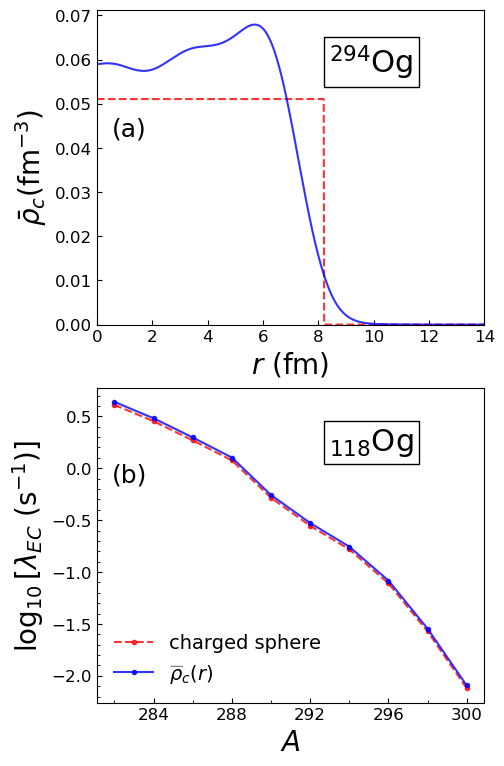

In [17]:
'''
Figure 3
'''
# now plot the results from exact calculations
nucleus = ['Og282', 'Og284','Og286','Og288','Og290','Og292','Og294','Og296','Og298','Og300']
#nucleus = ['Rn194', 'Rn196','Rn198','Rn200','Rn202','Rn204','Rn206','Rn208','Rn210']

fig, ax = plt.subplots(2,1, figsize = (5,9))


Z = 118

a_0 = 1e-15/5.29177e-11

def sph_box(r,R):
    if (r < R):
        return 3*Z/(4*np.pi*R**3)
    else:
        return 0

a_0 = 1e-15/5.29177e-11

data = np.loadtxt('density_radial.dat')
rvals= data[:,0]/a_0 
rho_avg_values = data[:,1]*a_0**3

ax[0].plot(rvals, np.array([sph_box(i,np.sqrt(5/3)*6.3529) for i in rvals]), color = 'red', ls = '--'
         , label = '$R = \sqrt{5/3}(<r^2>^{1/2})$', alpha = 0.8)


norm = np.trapz(rho_avg_values*4*np.pi*rvals**2,rvals)

rho_avg_values_norm = rho_avg_values/norm*Z
ax[0].plot(rvals, rho_avg_values_norm, color='blue', label = 'DFT', alpha = 0.8)

print(np.trapz(rho_avg_values_norm*4*np.pi*rvals**2,rvals))
ax[0].set_ylim(0)
ax[0].set_xlim(0,14)

ax[0].tick_params(axis="y",direction="in", which = 'both', labelsize = 12)
ax[0].tick_params(axis="x",direction="in", which = 'both', labelsize = 12)

ax[0].annotate('$^{294}$Og', xy=(0.6, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=22, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))

ax[0].set_xlabel("$r$ (fm)", size = 20)
ax[0].set_ylabel(r"$\bar{\rho}_c$(fm$^{-3}$)", size = 20)



dirac_DFT = []
dirac_A1 = []


for n in range(len(nucleus)):

    rates_LO_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K0/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K0 = np.loadtxt('calculations_DFT/'+nucleus[n]+'/FF_1m/K0/results_dirac.out', max_rows=2)[1]
    
    rates_LO_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K1/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K1 = np.loadtxt('calculations_DFT/'+nucleus[n]+'/FF_1m/K1/results_dirac.out', max_rows=2)[1]

    
    rates_LO = rates_LO_FF_1m_K0 + rates_LO_FF_1m_K1 
    rates_mcdf = rates_mcdf_FF_1m_K0 + rates_mcdf_FF_1m_K1 

    
    dirac_A1.append((np.log10(rates_LO)))
    dirac_DFT.append(np.log10(rates_mcdf))



print([float(i[2:]) for i in nucleus])
ax[1].plot([float(i[2:]) for i in nucleus], dirac_A1, marker = '.', label = 'charged sphere', ls = '--', color = 'red',
          alpha = 0.8)
#ax[1].plot([float(i[2:]) for i in nucleus], dirac_A2, marker = '.', label = 'Approx2', color = 'green', ls = '--')
ax[1].plot([float(i[2:]) for i in nucleus], dirac_DFT, marker = '.', label = r'$\widebar{\rho}_c(r)$', color = 'blue',alpha = 0.8)






ax[1].legend(fontsize = 12, frameon = False)
    

ax[1].tick_params(axis="y",direction="in", which = 'both', labelsize = 12)
ax[1].tick_params(axis="x",direction="in", which = 'both', labelsize = 12)

ax[1].xaxis.set_major_locator(ticker.MultipleLocator(4))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax[1].set_xlabel('$A$', size = 20)




ax[1].set_ylabel('$\log_{10}[\lambda_{EC}$ (s${}^{-1}$)]', size = 20)


ax[1].annotate('$_{118}$Og', xy=(0.6, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=22, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))



ax[1].legend(frameon = False, fontsize = 14)

ax[0].annotate('(a)', (0.04,0.6), xycoords='axes fraction', size = 18)
ax[1].annotate('(b)', (0.04,0.7), xycoords='axes fraction', size = 18)

#plt.ylim(1e-4)

#plt.savefig('figs/Og_rate_EC_charge_density.pdf', bbox_inches='tight')




[46.0, 48.0, 50.0, 52.0]
[90.0, 92.0, 94.0, 96.0, 98.0, 100.0]
[138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0]


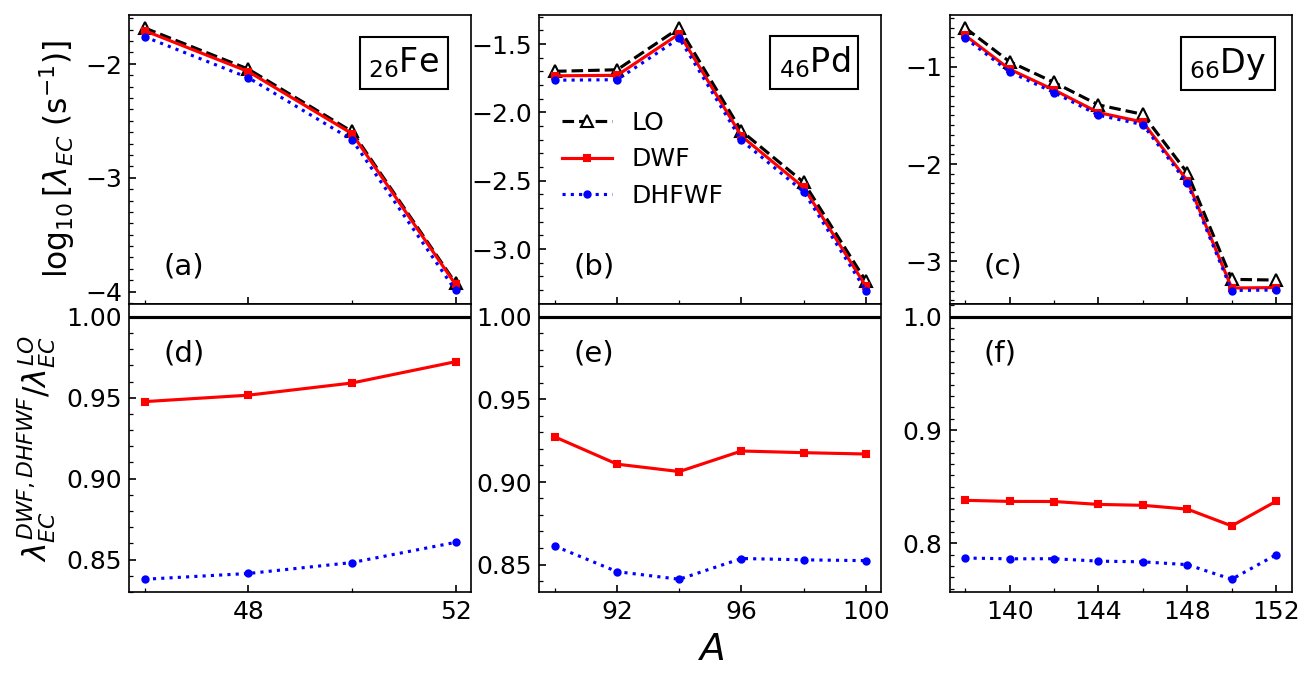

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


'''
Figure 4
'''



# now plot the results from exact calculations
nucleus = [['Fe46','Fe48','Fe50','Fe52'],['Pd90','Pd92','Pd94','Pd96','Pd98','Pd100'],
          ['Dy138','Dy140','Dy142','Dy144','Dy146','Dy148','Dy150','Dy152']]


fig, ax = plt.subplots(2,3, dpi = 150, figsize = (10,5))



for k in range(3):

    LO = []
    dirac = []
    mcdf = []

    for n in range(len(nucleus[k])):
    
        rates_LO_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K0/results_LO.out', max_rows=2)[1]
        rates_dirac_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K0/results_dirac.out', max_rows=2)[1]
        rates_mcdf_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K0/results_mcdf.out', max_rows=2)[1]
        
        rates_LO_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K1/results_LO.out', max_rows=2)[1]
        rates_dirac_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K1/results_dirac.out', max_rows=2)[1]
        rates_mcdf_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[k][n]+'/GT_1p/K1/results_mcdf.out', max_rows=2)[1]
    
        
        rates_LO = rates_LO_FF_1m_K0 + rates_LO_FF_1m_K1 
        rates_dirac = rates_dirac_FF_1m_K0 + rates_dirac_FF_1m_K1 
        rates_mcdf = rates_mcdf_FF_1m_K0 + rates_mcdf_FF_1m_K1 
    
        
        LO.append((np.log10(rates_LO)))
        dirac.append(np.log10(rates_dirac)) 
        mcdf.append(np.log10(rates_mcdf))

    LO = np.array(LO)
    dirac = np.array(dirac)
    mcdf = np.array(mcdf)
    
    
    print([float(i[2:]) for i in nucleus[k]])
    ax[0,k].plot([float(i[2:]) for i in nucleus[k]], LO, marker = '^',mfc='white', label = 'LO', ls = '--', color = 'black')
    ax[0,k].plot([float(i[2:]) for i in nucleus[k]], dirac, marker = 's', label = 'DWF', color = 'red', ls = '-',ms = 3)
    ax[0,k].plot([float(i[2:]) for i in nucleus[k]], mcdf, marker = '.', label = 'DHFWF', color = 'blue',ls=':')

    ax[0,k].set_xticklabels([])

    
    ax[1,k].plot([float(i[2:]) for i in nucleus[k]], 10**dirac/10**LO, marker = 's', label = 'DWF', color = 'red', ls = '-',ms = 3)
    ax[1,k].plot([float(i[2:]) for i in nucleus[k]], 10**mcdf/10**LO, marker = '.', label = 'DHFWF', color = 'blue',ls=':')

    ax[1,k].axhline(1, color = 'black')


plt.subplots_adjust(hspace = 0)


# ax[0].legend(fontsize = 12, frameon = False)

for i in range(2):
    for j in range(3):
        ax[i,j].tick_params(axis="y",direction="in", which = 'both', labelsize = 12)
        ax[i,j].tick_params(axis="x",direction="in", which = 'both', labelsize = 12)
    
        ax[i,j].xaxis.set_major_locator(ticker.MultipleLocator(4))
        ax[i,j].xaxis.set_minor_locator(ticker.MultipleLocator(2))


        ax[i,j].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        ax[1,j].yaxis.set_minor_locator(ticker.MultipleLocator(0.01))



ax[1,1].set_xlabel('$A$', size = 18)
ax[0,0].set_ylabel('$\log_{10}[\lambda_{EC}$ (s${}^{-1}$)]', size = 15)
ax[1,0].set_ylabel('$\lambda_{EC}^{DWF,DHFWF}/\lambda_{EC}^{LO}$', size = 15)


ax[0,1].legend(frameon = False, fontsize = 12, loc = 'center left')

ax[0,0].annotate('$_{26}$Fe', xy=(0.7, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=16, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))
ax[0,1].annotate('$_{46}$Pd', xy=(0.7, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=16, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))
ax[0,2].annotate('$_{66}$Dy', xy=(0.7, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=16, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))

labels = ['(a)','(b)','(c)','(d)','(e)','(f)']

k = 0
for j in range(3):
    ax[0,j].annotate(labels[k], (0.1,0.1), xycoords='axes fraction', size = 14)
    ax[1,j].annotate(labels[k+3], (0.1,0.8), xycoords='axes fraction', size = 14)
    k+=1

#ax[0].annotate('${}){86}$Rn', (0.1,0.3), 





#plt.ylim(1e-4)

plt.savefig('../figs/exact_EC/Fig4_update.pdf', bbox_inches='tight')




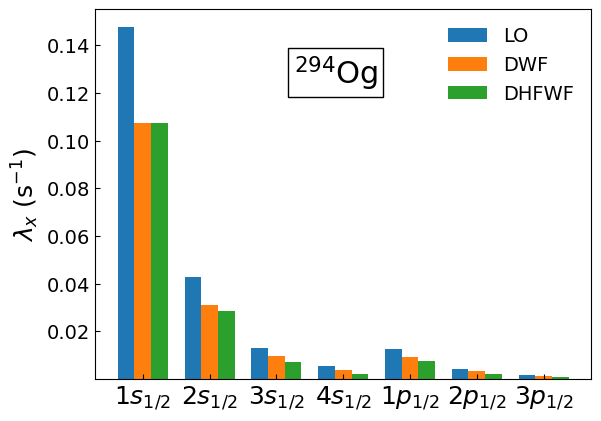

In [43]:
'''
Figures 5 & 8
'''

nucleus = 'Og294'

rates_LO_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K0/results_LO.out', skiprows=3,usecols=(2))
rates_dirac_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K0/results_dirac.out', skiprows=3,usecols=(2))
rates_mcdf_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K0/results_mcdf.out', skiprows=3,usecols=(2))

rates_LO_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K1/results_LO.out', skiprows=3,usecols=(2))
rates_dirac_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K1/results_dirac.out', skiprows=3,usecols=(2))
rates_mcdf_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus+'/FF_1m/K1/results_mcdf.out', skiprows=3,usecols=(2))

# rates_LO_GT_K0 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K0/results_LO.out', skiprows=3,usecols=(2))
# rates_dirac_GT_K0 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K0/results_dirac.out', skiprows=3,usecols=(2))
# rates_mcdf_GT_K0 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K0/results_mcdf.out', skiprows=3,usecols=(2))

# rates_LO_GT_K1 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K1/results_LO.out', skiprows=3,usecols=(2))
# rates_dirac_GT_K1 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K1/results_dirac.out', skiprows=3,usecols=(2))
# rates_mcdf_GT_K1 = np.loadtxt('calculations_R/'+nucleus+'/GT_1p/K1/results_mcdf.out', skiprows=3,usecols=(2))

rates_LO =  rates_LO_FF_1m_K0 + rates_LO_FF_1m_K1
rates_dirac =  rates_dirac_FF_1m_K0 + rates_dirac_FF_1m_K1
rates_mcdf =  rates_mcdf_FF_1m_K0 + rates_mcdf_FF_1m_K1

# rates_LO =  rates_LO_GT_K0 + rates_LO_GT_K1
# rates_dirac =  rates_dirac_GT_K0 + rates_dirac_GT_K1
# rates_mcdf =  rates_mcdf_GT_K0 + rates_mcdf_GT_K1

# get only first 6 rows
rates_LO = rates_LO[:7]
rates_dirac = rates_dirac[:7]
rates_mcdf = rates_mcdf[:7]

bar_width = 0.25
x_positions = np.arange(len(rates_LO))

# Plot the bars
plt.bar(x_positions-bar_width, rates_LO, width=bar_width, label = 'LO')
plt.bar(x_positions, rates_dirac, width=bar_width, label = 'DWF')
plt.bar(x_positions+bar_width, rates_mcdf, width=bar_width, label = 'DHFWF')

#plt.yscale('log')
plt.ylim(1e-8)
#plt.xlim(-1,10)
plt.legend(frameon = False, fontsize = 14)

plt.gca().tick_params(axis="y",direction="in", which = 'both', labelsize = 14)
plt.gca().tick_params(axis="x",direction="in", which = 'both', labelsize = 12)

plt.gca().annotate('$^{294}$Og', xy=(0.4, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=22, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))

# labels = ['$1s_{1/2}$','$2s_{1/2}$','$3s_{1/2}$','$4s_{1/2}$','$1p_{1/2}$','$2p_{1/2}$'
#           ,'$3p_{1/2}$','$1p_{3/2}$','$2p_{3/2}$','$3p_{3/2}$']
labels = ['$1s_{1/2}$','$2s_{1/2}$','$3s_{1/2}$','$4s_{1/2}$','$1p_{1/2}$','$2p_{1/2}$','$3p_{1/2}$']
plt.xticks(x_positions[:10], labels, size = 18)

#plt.suptitle('${}^{152}$Dy cont. of orbital $x$ to rate', size = 16)

plt.ylabel('$\lambda_x$ (s${}^{-1}$)', size = 18)

plt.savefig('../figs/exact_EC/Fig8_update.pdf', bbox_inches='tight')


0.9808953077606324
0.990235268473987


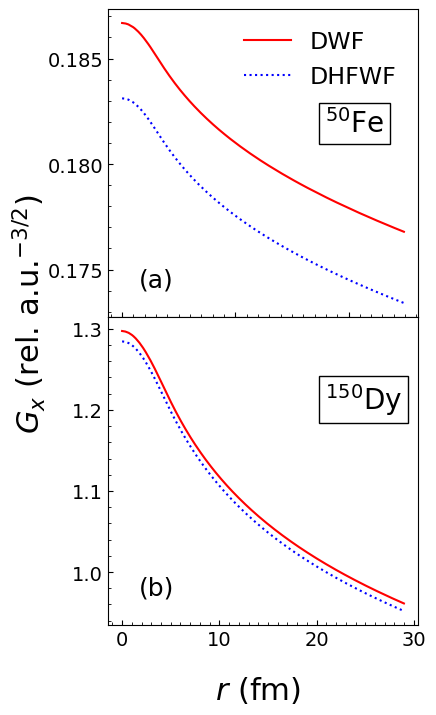

In [16]:
'''
Figure 6
'''



# plotting wavefunctions for comparison
state = ['1s1_2']
state_label = ['$1s_{1/2}$','$1p_{1/2}$','$3s_{1/2}$','$3p_{1/2}$']
labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']


fig, ax = plt.subplots(2,1, figsize = (4,8))

for s in range(len(state)):

    data_DIRAC_Fe = np.loadtxt('calculations_R/Fe50/GT_1p/K0/WAVES_INT_'+state[s]+'_DIRAC.DAT')
    data_DIRAC_Fe = data_DIRAC_Fe[data_DIRAC_Fe[:,0].argsort()]
    ax[0].plot(data_DIRAC_Fe[:,0], data_DIRAC_Fe[:,1], label = 'DWF', color = 'red')

    data_DIRAC_Dy = np.loadtxt('calculations_R/Dy150/GT_1p/K0/WAVES_INT_'+state[s]+'_DIRAC.DAT')
    data_DIRAC_Dy = data_DIRAC_Dy[data_DIRAC_Dy[:,0].argsort()]
    ax[1].plot(data_DIRAC_Dy[:,0], data_DIRAC_Dy[:,1], label = 'DWF', color = 'red')

    
    data_MCDF_Fe = np.loadtxt('calculations_R/Fe50/GT_1p/K0/WAVES_INT_'+state[s]+'_MCDF.DAT')
    data_MCDF_Fe = data_MCDF_Fe[data_MCDF_Fe[:,0].argsort()]
    ax[0].plot(data_MCDF_Fe[:,0], data_MCDF_Fe[:,1], label = 'DHFWF', color = 'blue', ls = ':')

    data_MCDF_Dy = np.loadtxt('calculations_R/Dy150/GT_1p/K0/WAVES_INT_'+state[s]+'_MCDF.DAT')
    data_MCDF_Dy = data_MCDF_Dy[data_MCDF_Dy[:,0].argsort()]
    ax[1].plot(data_MCDF_Dy[:,0], data_MCDF_Dy[:,1], label = 'DHFWF', color = 'blue', ls = ':')

    print(data_MCDF_Fe[:,1][10]/data_DIRAC_Fe[:,1][10])
    print(data_MCDF_Dy[:,1][10]/data_DIRAC_Dy[:,1][10])




#fig.suptitle('orbital: '+ state[0]+', ${}^{294}$Og', size = 16)
ax[0].legend(fontsize = 17, frameon = False)



k = 0
for i in range(2):
    ax[i].tick_params(axis="y",direction="in", which = 'both', labelsize = 14)
    ax[i].tick_params(axis="x",direction="in", which = 'both', labelsize = 14)
    ax[i].annotate(labels[k], (0.1,0.1), xycoords='axes fraction', size = 18)
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    
    k+=1 
    

# for i in range(4):
#     ax[0,i].set_title(state_label[i], size = 20)

# plt.subplots_adjust(hspace = 0)
ax[0].annotate('$^{50}$Fe', xy=(0.7, 0.6), xycoords='axes fraction',  # Relative position in the axes
            fontsize=20, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))

ax[1].annotate('$^{150}$Dy', xy=(0.7, 0.7), xycoords='axes fraction',  # Relative position in the axes
            fontsize=20, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))



fig.supxlabel('$r$ (fm)', size = 22)
fig.supylabel('$G_x$ (rel. a.u.$^{-3/2}$)', size = 22, x=-0.12, y=0.5, verticalalignment='center')

plt.subplots_adjust(hspace = 0)

ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.savefig('../figs/exact_EC/Fig6_update.pdf', bbox_inches='tight')

[282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0]
[282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0]


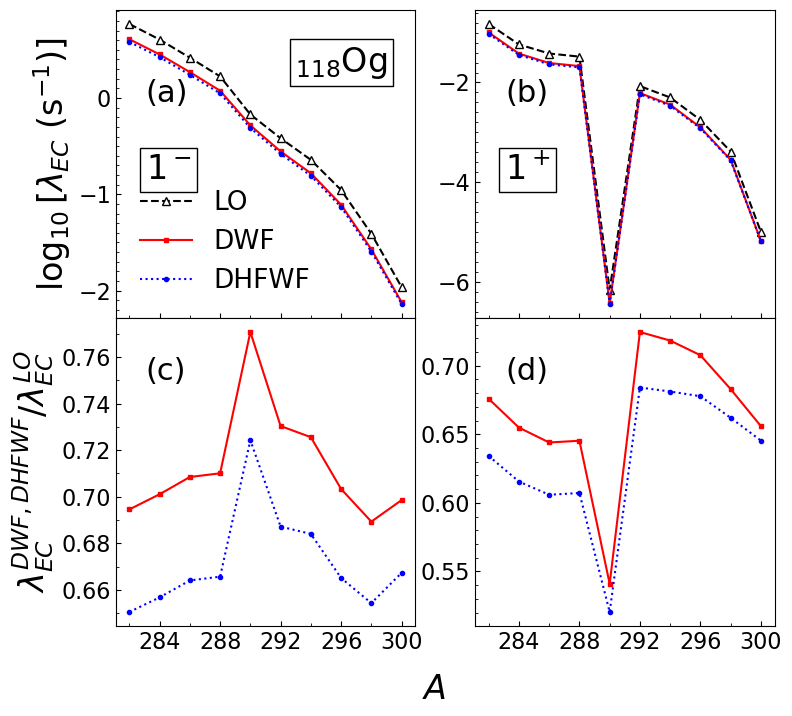

In [7]:
'''
Figure 7
'''


# now plot the results from exact calculations
nucleus = ['Og282', 'Og284','Og286','Og288','Og290','Og292','Og294','Og296','Og298','Og300']
#nucleus = ['Rn194', 'Rn196','Rn198','Rn200','Rn202','Rn204','Rn206','Rn208','Rn210']

fig, ax = plt.subplots(2,2, figsize = (8.5,8))

LO = []
dirac = []
mcdf = []

for n in range(len(nucleus)):

    rates_LO_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K0/results_LO.out', max_rows=2)[1]
    rates_dirac_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K0/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K0/results_mcdf.out', max_rows=2)[1]
    
    rates_LO_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K1/results_LO.out', max_rows=2)[1]
    rates_dirac_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K1/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/FF_1m/K1/results_mcdf.out', max_rows=2)[1]

    
    rates_LO = rates_LO_FF_1m_K0 + rates_LO_FF_1m_K1 
    rates_dirac = rates_dirac_FF_1m_K0 + rates_dirac_FF_1m_K1 
    rates_mcdf = rates_mcdf_FF_1m_K0 + rates_mcdf_FF_1m_K1 

    
    LO.append((np.log10(rates_LO)))
    dirac.append(np.log10(rates_dirac)) 
    mcdf.append(np.log10(rates_mcdf))


print([float(i[2:]) for i in nucleus])
ax[0,0].plot([float(i[2:]) for i in nucleus], LO, marker = '^', label = 'LO', ls = '--', color = 'black', mfc = 'white')
ax[0,0].plot([float(i[2:]) for i in nucleus], dirac, label = 'DWF', color = 'red', ls = '-', marker = 's', ms = 3)
ax[0,0].plot([float(i[2:]) for i in nucleus], mcdf, marker = '.', label = 'DHFWF', color = 'blue',ls=':')

LO = np.array(LO)
dirac = np.array(dirac)
mcdf = np.array(mcdf)

ax[1,0].plot([float(i[2:]) for i in nucleus], 10**dirac/10**LO, label = 'DWF', color = 'red', ls = '-', marker = 's', ms = 3)
ax[1,0].plot([float(i[2:]) for i in nucleus], 10**mcdf/10**LO, label = 'DHFWF', color = 'blue',ls=':', marker = '.')


LO = []
dirac = []
mcdf = []

# now repeat the same for the 1+ multipole
for n in range(len(nucleus)):

    rates_LO_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K0/results_LO.out', max_rows=2)[1]
    rates_dirac_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K0/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K0 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K0/results_mcdf.out', max_rows=2)[1]
    
    rates_LO_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K1/results_LO.out', max_rows=2)[1]
    rates_dirac_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K1/results_dirac.out', max_rows=2)[1]
    rates_mcdf_FF_1m_K1 = np.loadtxt('calculations_R/'+nucleus[n]+'/GT_1p/K1/results_mcdf.out', max_rows=2)[1]

    
    rates_LO = rates_LO_FF_1m_K0 + rates_LO_FF_1m_K1 
    rates_dirac = rates_dirac_FF_1m_K0 + rates_dirac_FF_1m_K1 
    rates_mcdf = rates_mcdf_FF_1m_K0 + rates_mcdf_FF_1m_K1 

    
    LO.append((np.log10(rates_LO)))
    dirac.append(np.log10(rates_dirac)) 
    mcdf.append(np.log10(rates_mcdf))


print([float(i[2:]) for i in nucleus])
ax[0,1].plot([float(i[2:]) for i in nucleus], LO, marker = '^', label = 'LO', ls = '--', color = 'black', mfc = 'white')
ax[0,1].plot([float(i[2:]) for i in nucleus], dirac, label = 'DWF', color = 'red', ls = '-', marker = 's', ms = 3)
ax[0,1].plot([float(i[2:]) for i in nucleus], mcdf, marker = '.', label = 'DHFWF', color = 'blue',ls=':')

LO = np.array(LO)
dirac = np.array(dirac)
mcdf = np.array(mcdf)

ax[1,1].plot([float(i[2:]) for i in nucleus], 10**dirac/10**LO, label = 'DWF', color = 'red', ls = '-', marker = 's', ms = 3)
ax[1,1].plot([float(i[2:]) for i in nucleus], 10**mcdf/10**LO, label = 'DHFWF', color = 'blue',ls=':', marker = '.')



for i in range(2):
    ax[0,i].set_xticklabels([])
    for j in range(2):
        ax[i,j].tick_params(axis="y",direction="in", which = 'both', labelsize = 16)
        ax[i,j].tick_params(axis="x",direction="in", which = 'both', labelsize = 16)
    
        ax[i,j].xaxis.set_major_locator(ticker.MultipleLocator(4))
        ax[i,j].xaxis.set_minor_locator(ticker.MultipleLocator(2))


        ax[i,j].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        ax[1,j].yaxis.set_minor_locator(ticker.MultipleLocator(0.01))



fig.supxlabel('$A$', size = 24)
ax[0,0].set_ylabel('$\log_{10}[\lambda_{EC}$ (s${}^{-1}$)]', size = 24)
ax[1,0].set_ylabel('$\lambda_{EC}^{DWF,DHFWF}/\lambda_{EC}^{LO}$', size = 24)


ax[0,0].annotate('$1^-$', xy=(0.1, 0.45), xycoords='axes fraction',  # Relative position in the axes
            fontsize=24, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))
ax[0,1].annotate('$1^+$', xy=(0.1, 0.45), xycoords='axes fraction',  # Relative position in the axes
            fontsize=24, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))
ax[0,0].annotate('$_{118}$Og', xy=(0.6, 0.8), xycoords='axes fraction',  # Relative position in the axes
            fontsize=24, color='black',
            bbox=dict(facecolor='white', edgecolor='black'))


ax[0,0].legend(frameon = False, fontsize = 19)

labels = ['(a)','(b)','(c)','(d)']

k = 0
for j in range(2):
    ax[0,j].annotate(labels[k], (0.1,0.7), xycoords='axes fraction', size = 22)
    ax[1,j].annotate(labels[k+2], (0.1,0.8), xycoords='axes fraction', size = 22)
    k+=1

plt.subplots_adjust(hspace = 0)


ax[1,0].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax[1,0].yaxis.set_minor_locator(ticker.MultipleLocator(0.01))

ax[0,1].yaxis.set_minor_locator(ticker.MultipleLocator(0.2))

plt.savefig('../figs/exact_EC/Fig7_update.pdf', bbox_inches='tight')






(-0.004, 0.09168495820000001)

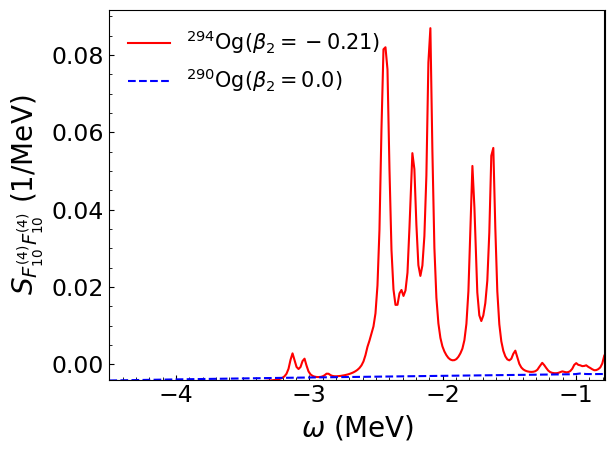

In [13]:
'''
Figure 9
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nucl = ['Og294','Og290']
colors = ['red','blue']
lsl = ['-','--']
labels = [r'${}^{294}$Og($\beta_2 = -0.21$)', r'${}^{290}$Og($\beta_2 = 0.0$)']

for n in range(len(nucl)):

    data_K1 = []
    data_K0 = []
    

    data_K0 = np.loadtxt('response/Fig9/response_1p_K0_GAMTGAMT_'+nucl[n]+'.dat')

    
    data_K1 = np.loadtxt('response/Fig9/response_1p_K1_GAMTGAMT_'+nucl[n]+'.dat')
        

    
    #plt.plot(data_K0[:,0], data_K0[:,2])
    #plt.plot(data_K0[:,0], data_K1[:,2])
    plt.plot(data_K1[:,0], data_K0[:,2]+2*data_K1[:,2], color = colors[n], ls = lsl[n], label = labels[n])

#plt.xlim(-5.4, 20)
plt.axvline(-0.782, color = 'black')
plt.legend(frameon = False, fontsize = 15, loc = 'upper left')


plt.gca().tick_params(axis="y",direction="in", which = 'both', labelsize = 17)
plt.gca().tick_params(axis="x",direction="in", which = 'both', labelsize = 17)

plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.005))



plt.gca().set_ylabel('$S_{F_{10}^{(4)}F_{10}^{(4)}}$ (1/MeV)', size = 20)
plt.gca().set_xlabel('$\omega$ (MeV)', size = 20)

#plt.ylim(-0.10,0.01)

plt.xlim(-4.5, -0.782)
#plt.gca().annotate('$-\Delta_{nH}$', (0.12, 0.7),xycoords='axes fraction', size = 18, rotation=90)
plt.ylim(-0.004)

#plt.savefig('../figs/GT_Og.pdf', bbox_inches='tight')